### Table of Contents

* [Goals](#goals)
* [Data](#Data)
    * [Loading the Data](#section1_1)
    * [Data Information](#section1_2)
* [Data Cleaning](#cleaning)
    * [Adding an Age Column](#section2_1)
    * [Checking the Education Variable](#section2_2)
* [Exploratory Data Analysis](#EDA)
    * [Big Picture](#section3_1)
    * [Purchasing Behavior by Income](#section3_2)
    * [More Purchasing Behavior by Income](#section3_3)
    * [Purchasing Behavior by Education and Income](#section3_4)
    * [Purchasing Behavior by Age](#section3_5)
* [Conclusion](#conclusion)
    

### Goals <a class="anchor" id="Goals"></a>

This notebook contains an analysis on some marketing data. The goal for this project was to do the following:
* Get acquainted with the data
* Clean the data so it is ready for analysis
* Develop some questions for analysis
* Analyze variables within the data to gain patterns and insights on these questions

### Data <a class="anchor" id="Data"></a>

The data for this project was downloaded from Kaggle:

[https://www.kaggle.com/mpwolke/cusersmarildownloadsvaccincsv](https://www.kaggle.com/mpwolke/cusersmarildownloadsvaccincsv)

#### Loading the Data <a class="anchor" id="section1_1"></a>
First, the necessary libraries are loaded into the notebook. The pandas library is used to import data from marketing_data.csv and preview the first five rows of the DataFrame.

In [1]:
# sets up matplotlib with interactive features
%matplotlib notebook
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re

In [7]:
df = pd.read_csv('vaccin.csv')

ParserError: Error tokenizing data. C error: Expected 3 fields in line 5, saw 4


#### Data Information <a class="anchor" id="section1_2"></a>

Some immediate insights are:
* There are 28 columns and 2240 rows.
* The name and datatype of each column -- most values are integers in this dataset.
* The ` income` column has missing data, values that are not integers or floats, and an extra space in the column name, so some cleaning will be necessary for this column prior to conducting EDA. 
* The column names could be renamed for more consistency.
* Some basic summary statistics on each of the numerical variables.

In [3]:
df.columns

Index(['id', 'YearBirth', 'Education', 'MaritalStatus', 'Income', 'Kidhome',
       'Teenhome', 'DtCustomer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProducts', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   2240 non-null   int64 
 1   YearBirth            2240 non-null   int64 
 2   Education            2240 non-null   object
 3   MaritalStatus        2240 non-null   object
 4   Income               2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   DtCustomer           2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProducts      2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [5]:
# see what columns have missing data
df.isnull().sum()

id                      0
YearBirth               0
Education               0
MaritalStatus           0
Income                 24
Kidhome                 0
Teenhome                0
DtCustomer              0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProducts         0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [6]:
print(df.describe())

                 id    YearBirth      Kidhome     Teenhome      Recency  \
count   2240.000000  2240.000000  2240.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804     0.444196     0.506250    49.109375   
std     3246.662198    11.984069     0.538398     0.544538    28.962453   
min        0.000000  1893.000000     0.000000     0.000000     0.000000   
25%     2828.250000  1959.000000     0.000000     0.000000    24.000000   
50%     5458.500000  1970.000000     0.000000     0.000000    49.000000   
75%     8427.750000  1977.000000     1.000000     1.000000    74.000000   
max    11191.000000  1996.000000     2.000000     2.000000    99.000000   

          MntWines    MntFruits  MntMeatProducts  MntFishProducts  \
count  2240.000000  2240.000000      2240.000000      2240.000000   
mean    303.935714    26.302232       166.950000        37.525446   
std     336.597393    39.773434       225.715373        54.628979   
min       0.000000     0.000000         0.000000

#### Data Cleaning <a class="anchor" id="cleaning"></a>

As mentioned before, the `Income` column could use some cleaning. The column names overall could also be renamed for more consistency. To do this, the following is done:
* Put all columns in [snake case format](https://www.ssc.wisc.edu/sscc/pubs/DWE/book/4-2-naming-variables.html) using regex and list comprehension
* Change `Income` values to floats
* Set the values as floats

The `Income` distribution is then looked at using boxplots. Since there is one large outlier, it is removed from the `marketing_data`. Next, the missing values are replaced with the mean income using the `.mean()` method.

`Income` is one of the main variables that will be explored in the analysis, so it is essential that it is tidy and ready for exploration

In [7]:
# Clean Columns

#taking dollar sign out of values and convert to float
marketing_data['Income'] = marketing_data['Income'].replace('[\$,]', '', regex=True).astype(float)

# summary stats
marketing_data['Income'].describe()

# put all columns into snake case format
marketing_data.columns = [re.sub(r'(?<!^)(?=[A-Z])', '_', x).lower() for x in marketing_data.columns]

#### Big Picture <a class="anchor" id="section3_1">

In order to observe the dataset as a whole, `DataFrame.hist()` is used.. It gives a full view of all numerical variables in the distribution. Most of the amount bought and number purchased variables are skewed right and have similar distributions.

Next, correlations between all numerical variables are viewed using a heat matrix. The heat matrix shows that `income` has the strongest association with numerous variables. Interestingly, it showed that `age` may not be a huge factor overall. This is something to look into it a bit more in the analysis.

<IPython.core.display.Javascript object>


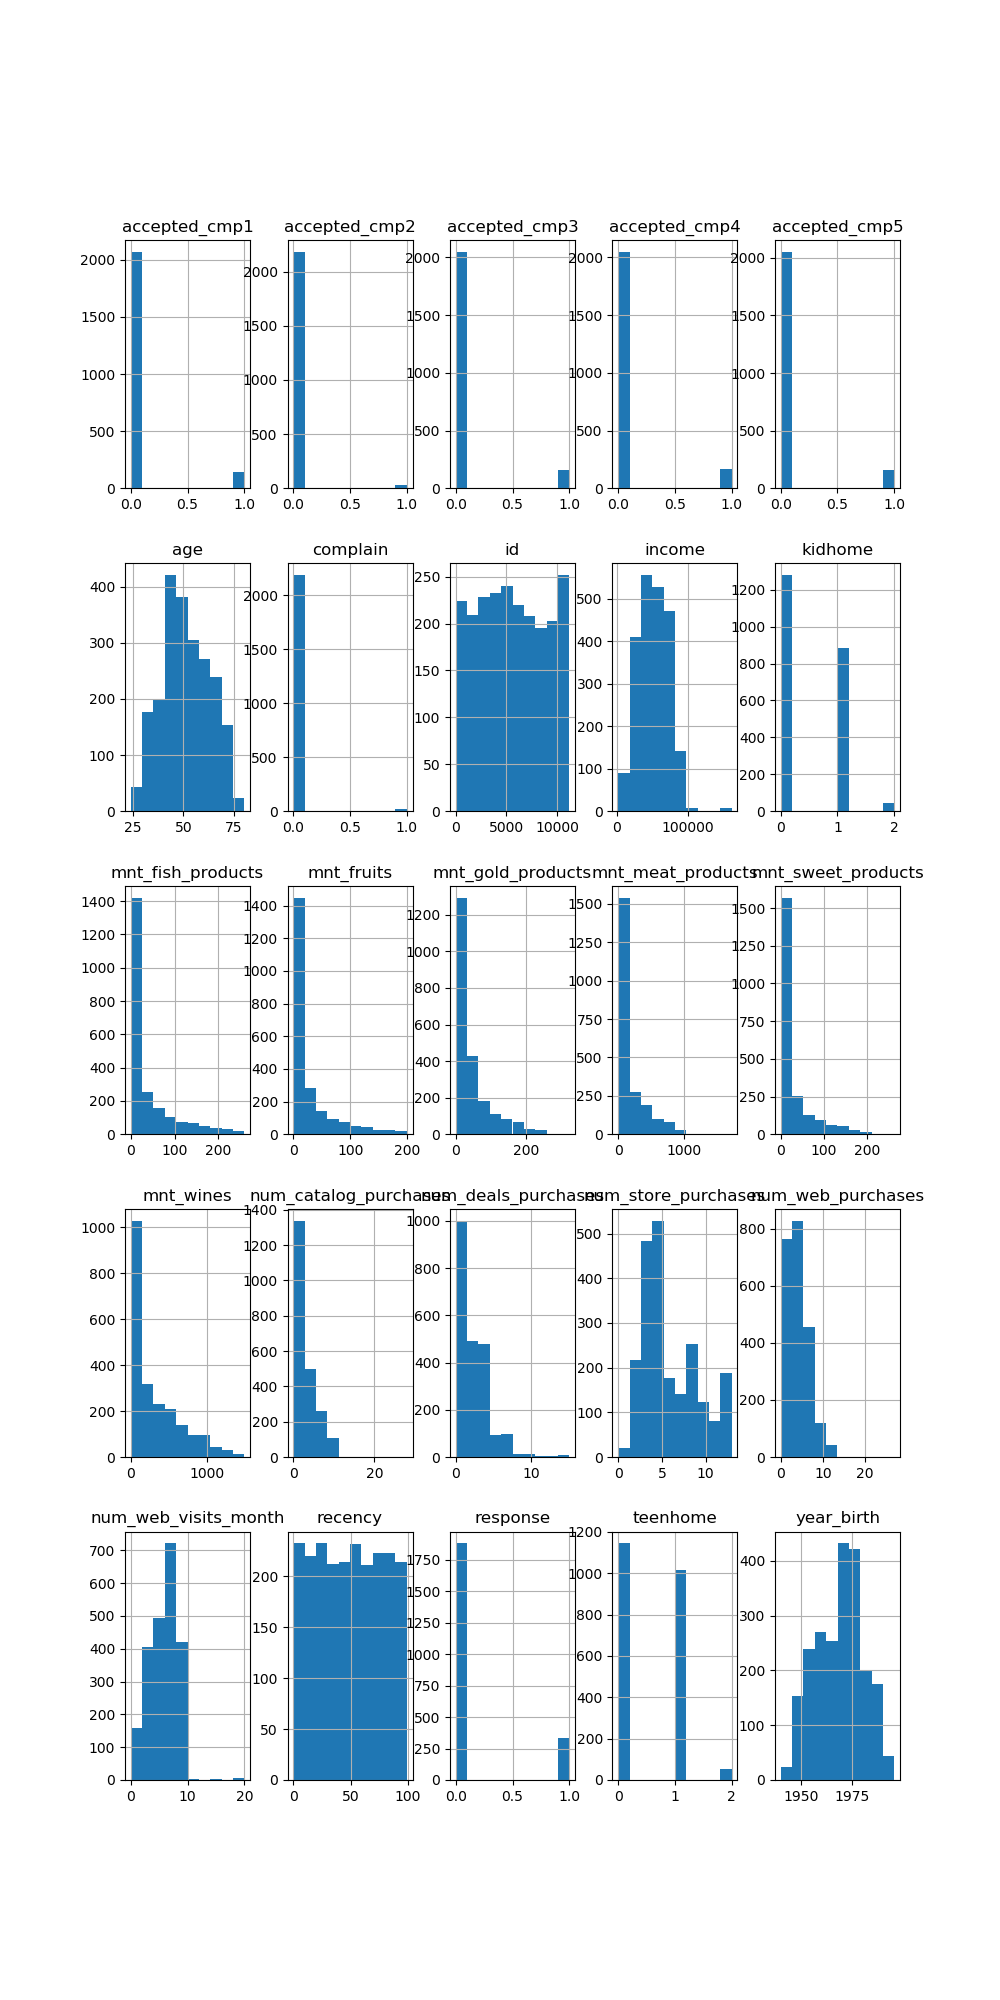

In [16]:
fig = plt.figure(figsize = (10,20))
ax = fig.gca()
marketing_data.hist(ax = ax);

This overview shows that the purchase behavior columns are all skewed to the right.

In [17]:
marketing_data.corr()

,id,year_birth,income,kidhome,teenhome,recency,mnt_wines,mnt_fruits,mnt_meat_products,mnt_fish_products,mnt_sweet_products,mnt_gold_products,num_deals_purchases,num_web_purchases,num_catalog_purchases,num_store_purchases,num_web_visits_month,accepted_cmp3,accepted_cmp4,accepted_cmp5,accepted_cmp1,accepted_cmp2,response,complain,age
id,1.000000,0.005086,0.000905,0.000971,-0.003508,-0.044147,-0.018906,0.010008,-0.003706,-0.022405,-0.004381,-0.008013,-0.040849,-0.017232,-0.000404,-0.011733,-0.008610,-0.035668,-0.023692,-0.004441,-0.017989,-0.014901,-0.021112,0.031839,-0.005086
year_birth,0.005086,1.000000,-0.199977,0.237497,-0.361932,-0.015694,-0.164615,-0.013447,-0.033622,-0.041154,-0.021516,-0.059779,-0.066156,-0.162265,-0.125856,-0.138998,0.120282,0.061097,-0.070035,0.019025,-0.011941,-0.007821,0.020937,-0.004602,-1.000000
income,0.000905,-0.199977,1.000000,-0.514523,0.034565,0.007965,0.688209,0.507354,0.692279,0.520040,0.523599,0.388299,-0.108207,0.459265,0.696589,0.631424,-0.650257,-0.015152,0.219633,0.395569,0.327524,0.104036,0.161387,-0.027900,0.199977
kidhome,0.000971,0.237497,-0.514523,1.000000,-0.039066,0.010623,-0.497203,-0.373258,-0.439031,-0.388643,-0.377843,-0.354922,0.216594,-0.372327,-0.504598,-0.501863,0.447258,0.016135,-0.162111,-0.204582,-0.174261,-0.081911,-0.077901,0.037067,-0.237497
teenhome,-0.003508,-0.361932,0.034565,-0.039066,1.000000,0.014392,0.003945,-0.175905,-0.261134,-0.205235,-0.163107,-0.018579,0.386805,0.162239,-0.112477,0.049212,0.130985,-0.042797,0.038168,-0.190119,-0.145198,-0.015633,-0.154402,0.007746,0.361932
recency,-0.044147,-0.015694,0.007965,0.010623,0.014392,1.000000,0.015981,-0.005257,0.022914,0.000788,0.025244,0.018148,0.002591,-0.005680,0.024197,-0.000460,-0.018965,-0.032361,0.017520,0.000233,-0.021147,-0.001429,-0.200114,0.005713,0.015694
mnt_wines,-0.018906,-0.164615,0.688209,-0.497203,0.003945,0.015981,1.000000,0.385844,0.568081,0.396915,0.389583,0.391461,0.009117,0.553663,0.634237,0.640219,-0.321616,0.061360,0.373349,0.472889,0.351610,0.206309,0.246320,-0.036420,0.164615
mnt_fruits,0.010008,-0.013447,0.507354,-0.373258,-0.175905,-0.005257,0.385844,1.000000,0.546740,0.593038,0.571474,0.393459,-0.134191,0.302301,0.485611,0.459875,-0.417741,0.014644,0.006598,0.208990,0.192417,-0.009924,0.123007,-0.002956,0.013447
mnt_meat_products,-0.003706,-0.033622,0.692279,-0.439031,-0.261134,0.022914,0.568081,0.546740,1.000000,0.572986,0.534624,0.357556,-0.121128,0.306841,0.733787,0.486349,-0.539194,0.018416,0.091677,0.375252,0.313379,0.043549,0.237966,-0.021017,0.033622
mnt_fish_products,-0.022405,-0.041154,0.520040,-0.388643,-0.205235,0.000788,0.396915,0.593038,0.572986,1.000000,0.583484,0.426299,-0.143147,0.299428,0.532241,0.457885,-0.446151,-0.000276,0.016058,0.194793,0.261712,0.002322,0.108135,-0.019098,0.041154


### Conclusion <a class="anchor" id="conclusion"></a>

#### Findings Overview

It has been shown `income` has the strongest relationship with purchase behavior of customers. However, interesting insights about `education` and `age` along with `age_group` have still been noted. These insights would be very helpful to how this store markets deals to their customers and prices items, such as wine since higher income groups tend to dominate alcohol sales. There is also opportunity to increase market to the `18 to 35` and `71 and Older` age groups to drive products sales. 

#### Next Steps

This dataset also has plenty of information has still not been touched upon yet. Some things to consider in a future analysis are:
* Results from existing marketing campaings
* Geographical data
* Customer marital status
* Customer complaints

Happy Coding!